<img src="https://raw.githubusercontent.com/HooshBaaz/2022_DataAnalytics_SummerSchool/main/assets/logo3.png" width="200" height="200" >

<div style="display:block"><br><br>
    <div style="display:block" align=left display=block> 
        <font size=5><b>Day4 - HandsOn1: Decision Trees</b></font><br>
        <hr/>

</div>

<pre>
.
├── Dataset
│
├── What is Entropy?
│
├── Decsion Trees
│ 
├── Visualization of Decision Trees
│
└──  (Optional) One step of Decision Tree from Scratch

</pre>

The sections marked with a Thinking Emoji (💭) are those which you need to read and answer. All right, without further ado, let's get started!
______________________________________

## Import Modules/Libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

__________________________________________________

## Dataset

Before doing anything, we need to get familiar with Dataset. The desired dataset is located in the `car_evaluation.csv` file. Car Evaluation Database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX. The classification goal is to predict quality of a car with given information. Features of this dataset are described below:


| Feature | Description |
| :- | :- |
|buying | buying price
|maint  |  price of the maintenance
| doors |  number of doors
| persons  | capacity in terms of persons to carry
| lug_boot | the size of luggage boot
| safety | estimated safety of the car
| Class | class labels for each car






read dataset in code cell below, considering the parameter `header` to be `None`

In [38]:
# Read Dataset
df = pd.read_csv("car_evaluation.csv", header=None)
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


### 📖 Preprocessing and Exploration
first we want you to do some preprocessing on the dataset.

#### 💭 Questions
- print shape of dataset
- print some random rows from dataset
- rename column names due to the description table
- plot frequency of each class label
- check if there is any missing values in dataset


**Write the answer below:** 

In [39]:
# print shape
df.shape

(1728, 7)

In [40]:
# print some random rows from dataset
df.sample(5)

,0,1,2,3,4,5,6
405,vhigh,low,5more,2,small,low,unacc
174,vhigh,high,4,4,med,low,unacc
1508,low,high,5more,more,med,high,vgood
12,vhigh,vhigh,2,4,med,low,unacc
648,high,med,2,2,small,low,unacc


In [41]:
# Rename column names
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


<AxesSubplot:>

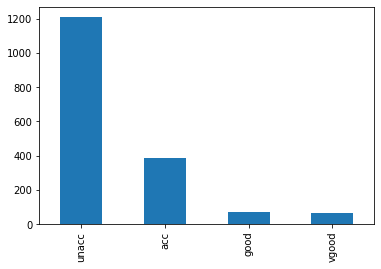

In [42]:
# plot frequency of labels
df['class'].value_counts().plot(kind='bar')

In [43]:
# check for missing values
df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

### 📖 Feature Engineering
After appropriate preprocessing, we need to encode our categorical features into numbers. for this purpose we can use

#### 💭 Questions
- print datatypes of dataframe columns
- as you have seen up to now our features are categorical. use `category_encoders ` library to convert these categorcal features to discrete numerical features with `ordinal encoding`.
- rename column names due to the description table
- plot frequency of each class label
- check if there is any missing values in dataset


**Write the answer below:** 

In [44]:
# print data types
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [45]:
# convert fetures to numerical features
import category_encoders as ce

# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
encoded_df = encoder.fit_transform(df)
encoded_df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,1,1,1,1,1,1,unacc
1,1,1,1,1,1,2,unacc
2,1,1,1,1,1,3,unacc
3,1,1,1,1,2,1,unacc
4,1,1,1,1,2,2,unacc


_________________________________

## What is Entropy?

as you saw in the theory session, in a decision tree, we decide if a node will be split or not by looking at the **information gain** that split would give us.

Where 

$$\text{Information Gain} = H(p_1^\text{node})- \left(w^{\text{left}}H\left(p_1^\text{left}\right) + w^{\text{right}}H\left(p_1^\text{right}\right)\right),$$

and $H$ is the entropy, defined as

$$H(p_1) = -p_1 \text{log}_2(p_1) - (1- p_1) \text{log}_2(1- p_1)$$

Remember that log here is defined to be in base 2. 
In this section we want to investigate the behavior of $H(p)$ behaves while $p$ varies.

### 📖 Entropy
first we want you to plot different distributuins and working with `scipy` library. Answer the Questions below to reach this purpose.

#### 💭 Questions
- Write a function that to compute the entropy. `use the equation below for this function`
- create a numpy array with numbers from `0` to `1` with a step of `0.01`
- calculate the entropy of samples that you have generated in the last section.
- Plot the Entropy of samples that you have calculated in the last question. the x-axis must show the numbers that you have generated between 0 and 1, these numbers are considered as probablity. the y-axis must show the entropy of each probablity.
- what is the relationship between entropy and probablity?

**Write the answer below:** 

In [46]:
# Define a functioin for entropy
def entropy(p):
    if p == 0 or p == 1:
        return 0
    else:
        return -p * np.log2(p) - (1- p)*np.log2(1 - p)

In [47]:
# create numbers between 0 and 1
data_points = np.arange(0,1,0.01)

In [48]:
# calculate entropy
enropies = [entropy(p) for p in data_points]

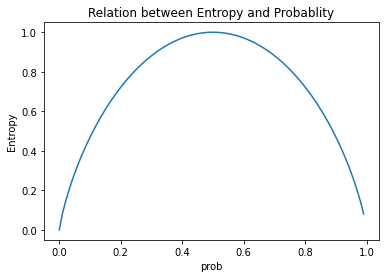

In [49]:
# plot entropy for each number(probablity)

plt.plot(data_points, enropies)
plt.xlabel("prob")
plt.ylabel("Entropy")
plt.title("Relation between Entropy and Probablity")
plt.show()

___________________________________________

## Decsion Trees

A Decision Tree algorithm is one of the most popular machine learning algorithms. It uses a tree like structure and their possible combinations to solve a particular problem. It belongs to the class of supervised learning algorithms where it can be used for both classification and regression purposes. 
A decision tree is a structure that includes a root node, branches, and leaf nodes. Each internal node denotes a test on an attribute, each branch denotes the outcome of a test, and each leaf node holds a class label. The topmost node in the tree is the root node.


### 📖 Decision Tree with entropy
First we want to use Decision Tree model with `Entropy` criterion.

#### 💭 Questions
- seperate feature vector and target variables and save them in variables called `X` and `y`.
- Split data to Train and Test with proportion of 80 to 20. consider 'stratify' to be 
- Train a decison tree classifier using `entropy` as criterion and fit train data. set the maximum depth parameter to 3.
- predict labels for test data points.
- print `f1` score for your test and train data. do you have any idea about overfiiting or underfitting?
- check the role of `max_depth` parameter on the complexity of the model and overfiiting/underfitting. plot the result of f1 score for differrent depths for training set and test set.

**Write the answer below:** 

In [50]:
# seperate feature vectors and target variables
X = encoded_df.drop(['class'], axis=1)
y = encoded_df['class']

In [51]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle=True )

In [52]:
# Train decision Tree classifier with entropy
from sklearn.tree import DecisionTreeClassifier
clf_ent = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# fit the model
clf_ent.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [53]:
# predict labels
y_pred_ent = clf_ent.predict(X_test)

In [54]:
# print f1 score for train and test data
from sklearn.metrics import f1_score

print(f1_score(y_train, clf_ent.predict(X_train), average='weighted'))
print(f1_score(y_test, y_pred_ent, average='weighted'))


0.7518618505319887
0.7742143948081835


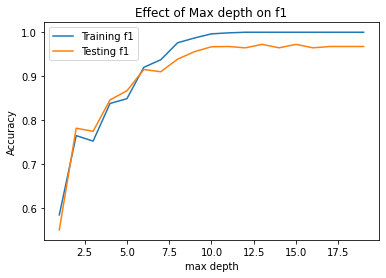

In [55]:
# chcek for the role of max_depth

# Define the list of sample sizes to test
max_depth = [i for i in range(1, 20)]

# Define an empty list to store the accuracy scores
train_f1 = []
test_f1 = []

for depth in max_depth:
    
    # Train a linear classifier on the subset of data
    model = DecisionTreeClassifier(criterion='entropy', max_depth=depth).fit(X_train, y_train)

    
    # Make predictions on the test set and train set and calculate the accuracy score
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    train_f1.append(f1_score(y_train, y_train_pred, average='weighted'))
    test_f1.append(f1_score(y_test, y_test_pred, average='weighted'))

    
# Plot the accuracy scores as a function of sample size

plt.plot(max_depth, train_f1, label="Training f1")
plt.plot(max_depth, test_f1 , label="Testing f1")
plt.xlabel('max depth')
plt.ylabel('Accuracy')
plt.title('Effect of Max depth on f1')
plt.legend()
plt.show()

### 📖 Decision Tree with entropy
you can also use `gini-index` as a criterion for decision tree classifiers.

#### 💭 Questions
- Train a decison tree classifier using `gini` as criterion and fit train data. set the maximum depth parameter to 3.
- predict labels for test data points.
- print `f1` score for your test and train data. do you have any idea about overfiiting or underfitting?
- compare the results with the classifier that you have used `entropy` as criterion.

**Write the answer below:** 

In [56]:
# Train a decision tree with gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [57]:
# predict labels for test data
y_pred_gini = clf_gini.predict(X_test)

In [58]:
# print f1 score for train and test data
print(f1_score(y_train, clf_gini.predict(X_train), average='weighted'))
print(f1_score(y_test, y_pred_gini, average='weighted'))


0.7518618505319887
0.7742143948081835


_______________________________________

## Visualization of Decision Trees

using decision trees as a classifier model gives us the ability to intrepret the decisions that a model makes by visulazing the model. we can use two methods to visulaize our decision tree model. in this section we are going to introduce you these to methods.

### 📖 Visualizing with plot_tree function
we can use `plot_tree` function of decision tree models in sklear library to visualize our model

#### 💭 Questions
- visualize the model that you have used `entropy` as a criterion using plot tree method.

**Write the answer below:** 

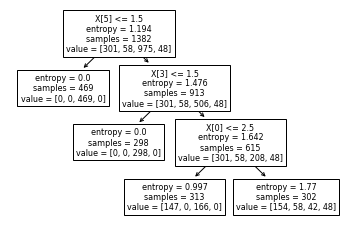

In [59]:
# visualize tree using sklearn
from sklearn import tree
tree.plot_tree(clf_ent);

### 📖 Visualizing with graphviz 
We can also export the tree in Graphviz format using the export_graphviz exporter. If you use the conda package manager, the graphviz binaries and the python package can be installed with `conda install python-graphviz`.

Alternatively binaries for graphviz can be downloaded from the graphviz project homepage, and the Python wrapper installed from pypi with `pip install graphviz`.

if you ecounter any problem with running graphviz, you can use this [link](https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft)

#### 💭 Questions
- visualize the model that you have used `gini` as a criterion using graphviz.

**Write the answer below:** 

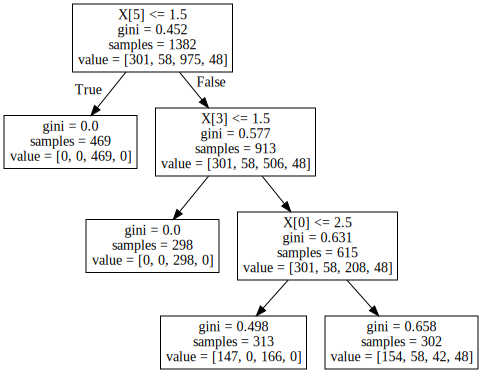

In [60]:
# visualize tree using graphviz
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

______________________________

## (Optional) One step of Decision Tree from Scratch

In this section we are going to have a binary classification using decision trees and implement the fisrt step of decision tree algorithm from scratch to understand how this algorithm works. due to simpilicity we are going to use a genric binary dataset in this section. regarding the information in the table below, to convert categorical features to ordinal features, we have used `one hot encoding`

|   Ear Shape | Face Shape | Whiskers |   Cat  |
|:---------:|:-----------:|:---------:|:------:|
|   Pointy   |   Round     |  Present  |    1   |
|   Floppy   |  Not Round  |  Present  |    1   |
|   Floppy   |  Round      |  Absent   |    0   |
|   Pointy   |  Not Round  |  Present  |    0   |
|   Pointy   |   Round     |  Present  |    1   |
|   Pointy   |   Round     |  Absent   |    1   |
|   Floppy   |  Not Round  |  Absent   |    0   |
|   Pointy   |  Round      |  Absent   |    1   |
|    Floppy  |   Round     |  Absent   |    0   |
|   Floppy   |  Round      |  Absent   |    0   |


In [61]:
# Creating a binary dataset
X_train = np.array([[1, 1, 1],
[0, 0, 1],
 [0, 1, 0],
 [1, 0, 1],
 [1, 1, 1],
 [1, 1, 0],
 [0, 0, 0],
 [1, 1, 0],
 [0, 1, 0],
 [0, 1, 0]])

y_train = np.array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0])

On each node, we compute the information gain for each feature, then split the node on the feature with the higher information gain, by comparing the entropy of the node with the weighted entropy in the two splitted nodes. So, the root node has every animal in our dataset. Remember that $p_1^{node}$ is the proportion of positive class (cats) in the root node. So

$$p_1^{node} = \frac{5}{10} = 0.5$$

To illustrate, let's compute the information gain if we split the node for each of the features. To do this, let's write some functions.

### 📖 Information gain of each feature
To illustrate, let's compute the information gain if we split the node for each of the features. To do this, let's write some functions.

#### 💭 Questions
- write a function  for any Given a dataset and a index feature which return two lists for the two split nodes, the left node has the animals that have  that feature = 1 and the right node those that have the feature = 0 
- define another function to compute `weighted entropy`for each feature in splitted nodes. this function need to take `x_train`, `y_train`, `left` and `right` indices that you found in the previous question and its going to return `weighted entropy` using this formula below:
  - $w^{\text{left}}$ and $w^{\text{right}}$, the proportion of animals in **each node**.
  - $p^{\text{left}}$ and $p^{\text{right}}$, the proportion of cats in **each split**.

$$\text{weighted entropy} = w^{left} * H(p^{left}) + w^{right} * H(p^{left})$$

- test your functions on feature with indice 0.
- To compute the `Information Gain` we must subtract it from the entropy in the node we chose to split (in this case, the root node). write another  to calculate information gain for each feature in splitted node. this function needs to take `x_train`, `y_train`, `left` and `right` indices as input and return the information gain by subtracting weighted entropy from previous node's entropy as the formula shows in the second section. you can consider entropy of node p1 as we describe equal to frequency of labels equal to 1 in your dataset.
- for each feature in the dataset compute the information gain and select the feature which has the highest information gain.




**Write the answer below:** 

In [62]:
# Function to split indices
def split_indices(X, index_feature):
    left_indices = []
    right_indices = []
    for i,x in enumerate(X):
        if x[index_feature] == 1:
            left_indices.append(i)
        else:
            right_indices.append(i)
    return left_indices, right_indices

In [63]:
# function for weighted entropy
def weighted_entropy(X,y,left_indices,right_indices):
    w_left = len(left_indices)/len(X)
    w_right = len(right_indices)/len(X)
    p_left = sum(y[left_indices])/len(left_indices)
    p_right = sum(y[right_indices])/len(right_indices)
    
    weighted_entropy = w_left * entropy(p_left) + w_right * entropy(p_right)
    return weighted_entropy

In [64]:
# calculate information gain
def information_gain(X, y, left_indices, right_indices):
    p_node = sum(y)/len(y)
    h_node = entropy(p_node)
    w_entropy = weighted_entropy(X,y,left_indices,right_indices)
    return h_node - w_entropy

In [65]:
# calculate information gain for each feature
for i, feature_name in enumerate(['Ear Shape', 'Face Shape', 'Whiskers']):
    left_indices, right_indices = split_indices(X_train, i)
    i_gain = information_gain(X_train, y_train, left_indices, right_indices)
    print(f"Feature: {feature_name}, information gain if we split the root node using this feature: {i_gain:.2f}")
    

Feature: Ear Shape, information gain if we split the root node using this feature: 0.28
Feature: Face Shape, information gain if we split the root node using this feature: 0.03
Feature: Whiskers, information gain if we split the root node using this feature: 0.12


this was one step of performing decision tree algorithm on our simple data. The process is recursive, which means we must perform these calculations for each node until we meet a stopping criteria:

- If the tree depth after splitting exceeds a threshold
- If the resulting node has only 1 class
- If the information gain of splitting is below a threshold